# Word Cloud

In [48]:
'''
Libraries that are used to create a Word Cloud
numpy - is used to draw a multi-dimensional array ; used with Pandas for Data Analysis
matplotlib - this is a basic python lib to draw plots; base for other libraries like Seaborn and WordCloud
pillow - this library helps to read the image
'''

'\nLibraries that are used to create a Word Cloud\nnumpy - is used to draw a multi-dimensional array ; used with Pandas for Data Analysis\nmatplotlib - this is a basic python lib to draw plots; base for other libraries like Seaborn and WordCloud\npillow - this library helps to read the image\n'

In [49]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [50]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [51]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image, ImageFilter                              #the name of the package to import is PIL
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline 

In [52]:
# loading the dataframe
wine_df = pd.read_csv('/Users/navneetgujjar/Documents/Python Files/winemag-data-130k-v2.csv', index_col=0)
# index_col = we dont read the heading as a separated column

In [53]:
print(wine_df.shape[0]) # this gives number of rows
print(wine_df.shape[1]) # this gives number of columns
print(wine_df.shape)    # this gives rows and columns
# wine_df.info() --> this gives rows and column info of a dataset

129971
13
(129971, 13)


In [54]:
# get specific columns of a dataframe
wine_df[['country','description','designation']].head(3)

,country,description,designation
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN


# Word Cloud from a dataframe

# Wine data

There are 129971 words in the description of wine data
There are 198 stopwords after adding the custom list of stopwords


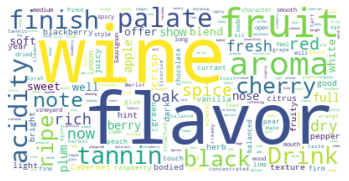

In [56]:
# getting all the words in the description field of the wine dataframe
textDesc = pd.read_csv('/Users/navneetgujjar/Documents/Python Files/winemag-data-130k-v2.csv', index_col=0)

print("There are {} words in the description of wine data".format(len(textDesc)))
my_stopwords = ["A", "The", "They","so","This","and"] + list(STOPWORDS)

'''
collocations are the words that are commonly used in pairs
it is better to use collocations = False when using stopwords since the redundant data will be removed
'''
print('There are {} stopwords after adding the custom list of stopwords'.format(len(my_stopwords)))
# create and generate wordcloud image
wordcloud = WordCloud(collocations = False, 
                      background_color = 'white',
                      stopwords = my_stopwords).generate(" ".join(textDesc['description']))

# display the image which is generate
plt.imshow(wordcloud, interpolation='bilinear') # imshow to show the image
plt.axis("off") # no axis ticks
plt.show()

# interpolation - resampling is done; as the image pixel size and screen resolution doesn't match
# different methods that can be used for interpolation= 
# 'None', 'nearest', 'bilinear', 'bicubic', 'spline16','spline36', 'hanning', 'hamming', 'hermite', 
# 'kaiser', 'quadric','catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos'

# Covid-19 Data

In [57]:
# read the data
covid_df = pd.read_csv("/Users/navneetgujjar/Documents/Python Files/covid19_tweets.csv")

In [58]:
# To open NLTK Downloader and download the packages required to run the stopwords from nltk
# nltk.download()

In [59]:
# Steps before plotting the image
# 1. Lowercase all words
# 2. Remove punctuation
# 3. Remove stopwords

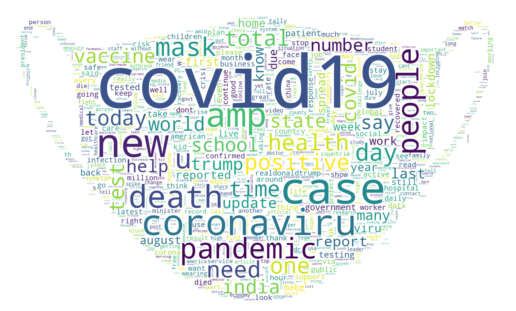

<Figure size 432x288 with 0 Axes>

In [60]:
import string
text_covid = pd.read_csv("/Users/navneetgujjar/Documents/Python Files/covid19_tweets.csv")

# changed to lower case
text_covid["text"]=text_covid['text'].str.lower()
text_covid['text'].head()

# Define the function to remove the punctuation
def remove_punctuations(text_covid):
    for punctuation in string.punctuation:
        text_covid = text_covid.replace(punctuation, '')
    return text_covid
text_covid['text'] = text_covid['text'].apply(remove_punctuations)

# Removing stopwords
import nltk
from nltk.corpus import stopwords
sw = list(stopwords.words("english"))
my_covid_stopwords = ["A", "The", "They","so","This","and"] + list(STOPWORDS) + sw

# Creating word cloud of the cleaned data
mask =  np.array(Image.open('/Users/navneetgujjar/Documents/Python Files/mask3.png'))
mask
word_cloud = WordCloud(collocations= False, 
                       stopwords= my_covid_stopwords, 
                       background_color = 'white',
                       mask = mask, max_words=999, 
                       max_font_size=200,
                       random_state=1,
                       width=1500, height=800).generate(''.join(text_covid['text']))
plt.figure(figsize=(9,10))
plt.imshow(word_cloud , interpolation= 'bilinear')
plt.axis("off")
plt.show()
plt.savefig('CovidWordCloud.png', facecolor='k', bbox_inches='tight')

In [61]:
# it is important that the image should be of 255 array, since 255 means perfect white.
# below we are checking is the array of the image of 255 pixels or not
mask =  np.array(Image.open('/Users/navneetgujjar/Documents/Python Files/mask3.png'))